In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
from statsmodels.tsa.ar_model import AutoReg,ARResults

 ### Load Data

In [3]:
df = pd.read_excel("C:/Users/JIMMY ULAHANNAN/Downloads/Time Series Code Data/indian population.xlsx",index_col='Year',parse_dates=True)

In [4]:
df.index.freq='YS'

In [5]:
df.head()

,Population
Year,
1950-01-01,357021100
1951-01-01,364922360
1952-01-01,372997188
1953-01-01,381227705
1954-01-01,389731406


In [6]:
df.index

DatetimeIndex(['1950-01-01', '1951-01-01', '1952-01-01', '1953-01-01',
               '1954-01-01', '1955-01-01', '1956-01-01', '1957-01-01',
               '1958-01-01', '1959-01-01', '1960-01-01', '1961-01-01',
               '1962-01-01', '1963-01-01', '1964-01-01', '1965-01-01',
               '1966-01-01', '1967-01-01', '1968-01-01', '1969-01-01',
               '1970-01-01', '1971-01-01', '1972-01-01', '1973-01-01',
               '1974-01-01', '1975-01-01', '1976-01-01', '1977-01-01',
               '1978-01-01', '1979-01-01', '1980-01-01', '1981-01-01',
               '1982-01-01', '1983-01-01', '1984-01-01', '1985-01-01',
               '1986-01-01', '1987-01-01', '1988-01-01', '1989-01-01',
               '1990-01-01', '1991-01-01', '1992-01-01', '1993-01-01',
               '1994-01-01', '1995-01-01', '1996-01-01', '1997-01-01',
               '1998-01-01', '1999-01-01', '2000-01-01', '2001-01-01',
               '2002-01-01', '2003-01-01', '2004-01-01', '2005-01-01',
      

### Data Visualization

<AxesSubplot:xlabel='Year'>

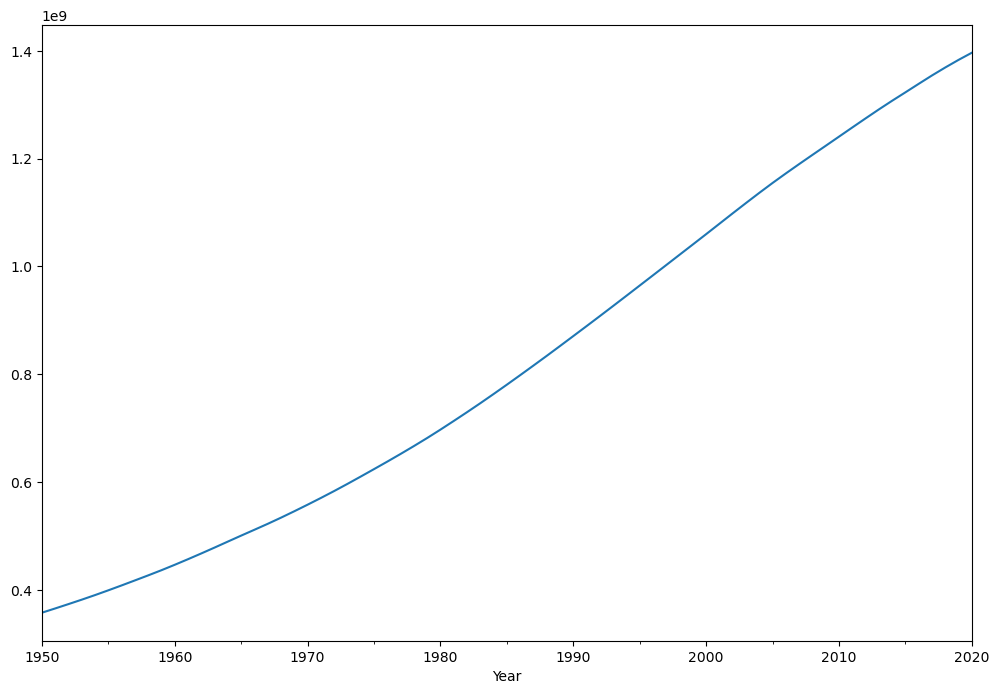

In [7]:
df['Population'].plot(figsize=(12,8))

In [8]:
len(df)

71

### Spliting Data into Training and Testing Sets

In [9]:
train = df.iloc[:60]
test = df.iloc[60:]

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
start = len(train)
end = len(train) + len(test) - 1

### Building the AutoRegressive (AR) Model for lags=1

In [12]:
AR1fit = AutoReg(train['Population'], lags=1).fit()

In [13]:
AR1fit.params

const            4.915282e+06
Population.L1    1.013546e+00
dtype: float64

### Making Predictions for Model of lags=1

In [14]:
prediction1 = AR1fit.predict(start=start,end=end).rename('AR(1) predections')

In [15]:
prediction1

2010-01-01    1.245131e+09
2011-01-01    1.266913e+09
2012-01-01    1.288990e+09
2013-01-01    1.311365e+09
2014-01-01    1.334044e+09
2015-01-01    1.357031e+09
2016-01-01    1.380328e+09
2017-01-01    1.403942e+09
2018-01-01    1.427875e+09
2019-01-01    1.452132e+09
2020-01-01    1.476718e+09
Freq: AS-JAN, Name: AR(1) predections, dtype: float64

### Ploting the Predicted Model

<AxesSubplot:xlabel='Year'>

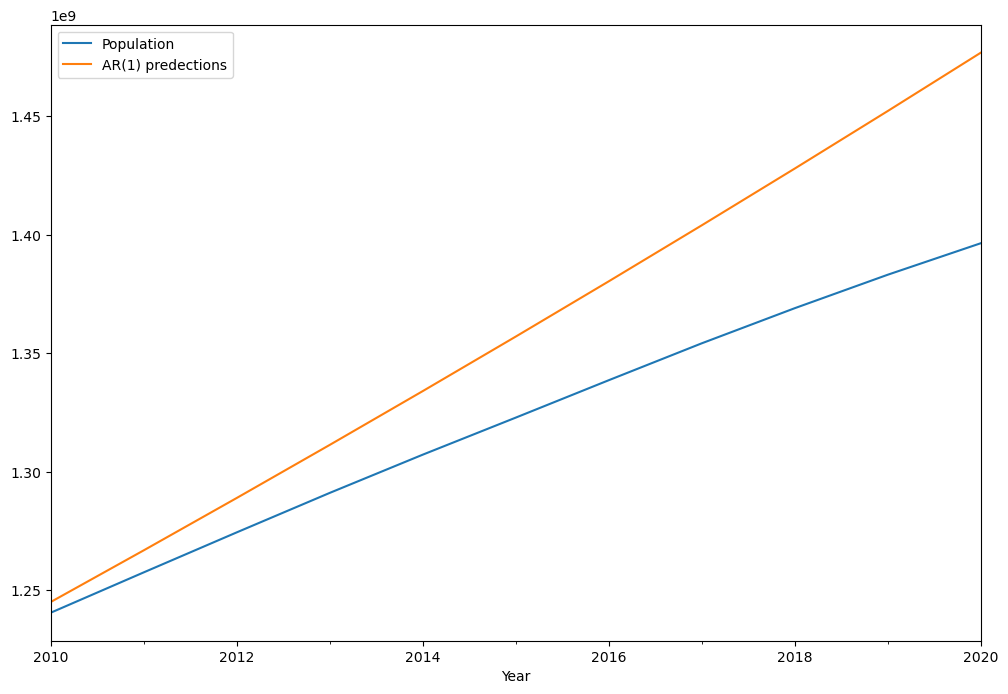

In [16]:
test.plot(figsize=(12,8),legend=True)
prediction1.plot(legend=True)

### Evaluating Model Performance

To assess the accuracy of the model, the Mean Absolute Error (MAE) is computed. A lower MAE indicates better performance.

In [17]:
from sklearn.metrics import mean_squared_error

# Define a function to test different lags
def find_best_lag(df, max_lag=29):
    best_lag = None
    best_score = float("inf")

    

    for lag in range(1, max_lag + 1):
        errors = []
        
        model = AutoReg(train, lags=lag).fit()
        preds = model.predict(start=start, end=end)
        error = mean_squared_error(test, preds)
        errors.append(error)
        
        avg_error = np.mean(errors)
        print(f"Lag {lag}: MSE = {avg_error}")

        if avg_error < best_score:
            best_score = avg_error
            best_lag = lag

    return best_lag

# Find best lag using cross-validation
optimal_lag = find_best_lag(df)
print(f"\nBest Lag Chosen: {optimal_lag}")

Lag 1: MSE = 1955199186866253.5
Lag 2: MSE = 340390445467619.3
Lag 3: MSE = 34078880094171.773
Lag 4: MSE = 255006085744929.7
Lag 5: MSE = 189324986731375.97
Lag 6: MSE = 241155639298024.12
Lag 7: MSE = 203051204749948.72
Lag 8: MSE = 223237513048641.78
Lag 9: MSE = 185359390010392.44
Lag 10: MSE = 162700471382222.6
Lag 11: MSE = 168080273130432.4
Lag 12: MSE = 194894355218850.44
Lag 13: MSE = 125811216364759.77
Lag 14: MSE = 137506403736340.61
Lag 15: MSE = 115952292538431.39
Lag 16: MSE = 93540767664497.56
Lag 17: MSE = 30214087390027.535
Lag 18: MSE = 44175174297299.72
Lag 19: MSE = 4809097778405.965
Lag 20: MSE = 228903803249723.1
Lag 21: MSE = 9709827124425.625
Lag 22: MSE = 15738938802092.082
Lag 23: MSE = 130151977779604.23
Lag 24: MSE = 836908547830071.2
Lag 25: MSE = 224608137688711.6
Lag 26: MSE = 18284684984166.344
Lag 27: MSE = 882391880081872.1
Lag 28: MSE = 130181037590119.0
Lag 29: MSE = 2084595892353619.0

Best Lag Chosen: 19


### Building the AutoRegressive (AR) Model for lags=19

In [18]:
ARfit = AutoReg(train['Population'], lags=19).fit()

In [19]:
ARfit.params

const             253844.909506
Population.L1          3.353612
Population.L2         -5.073610
Population.L3          5.417153
Population.L4         -5.258483
Population.L5          4.673791
Population.L6         -3.435516
Population.L7          1.876419
Population.L8         -0.705785
Population.L9          0.597946
Population.L10        -1.441623
Population.L11         2.381246
Population.L12        -2.878162
Population.L13         2.827788
Population.L14        -2.610319
Population.L15         2.385382
Population.L16        -1.824301
Population.L17         1.050273
Population.L18        -0.460614
Population.L19         0.125112
dtype: float64

### Making Predictions and Ploting the predictions

In [20]:
predictions8 = ARfit.predict(start,end)
predictions8 = predictions8.rename('AR(19) Predictions')

<AxesSubplot:xlabel='Year'>

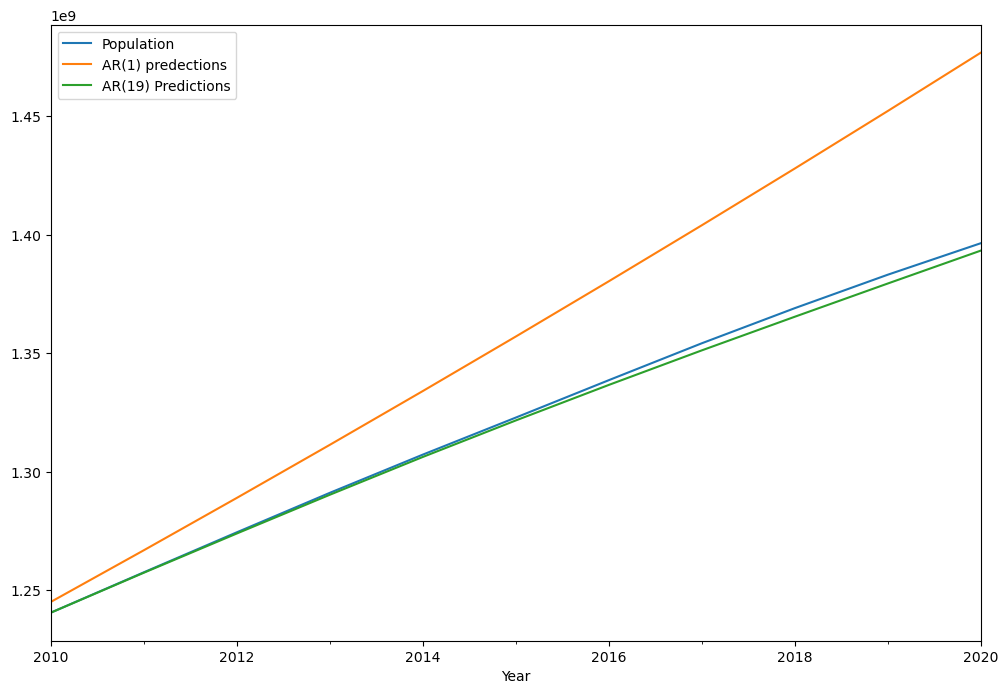

In [21]:
test.plot(figsize=(12,8),legend=True)
prediction1.plot(legend=True)
predictions8.plot(legend=True)

### Forecasting Future Population

In [22]:
forecasted_values = ARfit.predict(start=len(df),end=len(df)+3).rename('Forcast')

<AxesSubplot:xlabel='Year'>

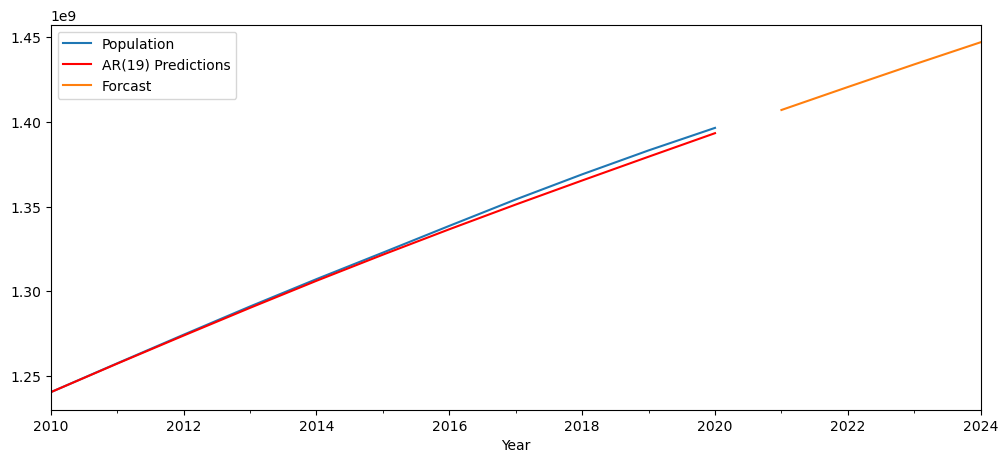

In [23]:
test.plot(figsize=(12,5),legend=True)

predictions8.plot(legend=True,color='red')

forecasted_values.plot(legend=True)

In [24]:
forecasted_values.head()

2021-01-01    1.406933e+09
2022-01-01    1.420477e+09
2023-01-01    1.433822e+09
2024-01-01    1.446871e+09
Freq: AS-JAN, Name: Forcast, dtype: float64